# <h1 align="center">**Financial Signal Processing Coursework Part One**</h1>


<h3 align="center">
  Prof. Danilo P. Mandic
  <br>
XXXNAME
  <br>
  XXXID
</h3>



# **1. Regression Methods**

## **1.1 Processing stock price data in Python**
For the following question, initialise your Python session by importing the following modules:

```python
import numpy as np    # scientific library
import pandas as pd   # data structure library
import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

### **Task 1**
``` python
Import
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/priceData.csv
```
using the following commands:
``` python
px = pd.read_csv("priceData.csv")
```
and perform the natural-log transform of the price
``` python
using logpx = np.log(px).
```
Plot the time-series using logpx.plot().

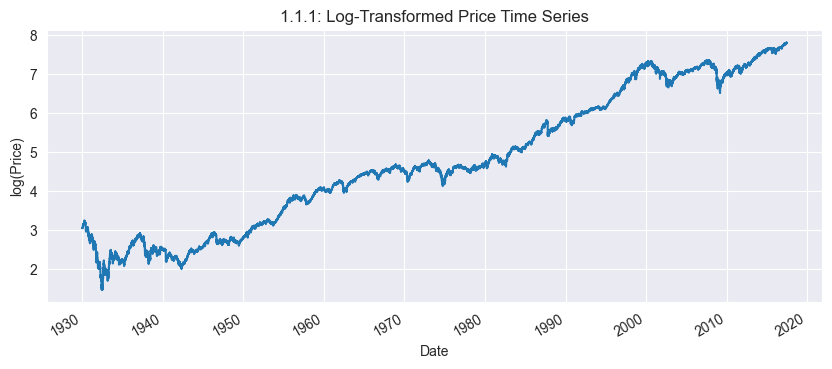

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
df = pd.read_csv("priceData.csv",
                 parse_dates=["date"],
                 dayfirst=True,
                 index_col="date")

# Sort by date ascending just in case
df.sort_index(inplace=True)

# Extract price series
px = df["SPX Index"]

# Compute log-price
logpx = np.log(px)

# Plot log-price
plt.figure(figsize=(10, 4))
logpx.plot()
plt.title("1.1.1: Log-Transformed Price Time Series")
plt.xlabel("Date")
plt.ylabel("log(Price)")
plt.grid(True)
plt.show()

##### Figure 1: Log-Transformed Price Time Series
The chart displays the log-transformed SPX index from roughly 1930 to 2020, showing an overall upward trend with considerable short-term fluctuations. It highlights clear declines during market downturns, yet it also demonstrates robust long-term growth.

### **Task 2**
Using a sliding window of 252 days, compute and store the evolution of the “sliding-window-based” first and [2]
 second-order statistics (mean and variance) of the price and log-price time series, using 1-day increments,
 and plot these as a function of time on separate figures. Comment on the stationarity of price time-series
 with reference to your figures.


 ```python
# sliding mean
plt.figure()
logpx.rolling(252).mean().plot()
plt.show()

# sliding standard deviation
plt.figure()
logpx.rolling(252).std().plot()
plt.show()

##### Figure 2: Rolling Mean of Price
This chart displays the log-transformed SPX index from roughly 1930 to 2020, revealing an overall upward trend with significant short-term fluctuations. It emphasizes notable declines during market downturns while also showcasing robust long-term growth.

##### Figure 3: Rolling Std of Price
The figure also shows the 252-day rolling standard deviation of SPX index prices. In the early decades, volatility (as measured by the standard deviation) was relatively low, but it has increased markedly over time, spiking during significant market events. Because the standard deviation varies considerably across different periods, the second moment of the price series does not exhibit stationarity—a stationary process requires a constant variance, which is clearly not the case with the original price data.

##### Figure 4: Rolling Mean of Log-Price
The chart displays the 252-day rolling mean of the log-transformed SPX index, which appears to be relatively stable over time. This suggests that the first moment of the log-price series is stationary, as the mean remains relatively constant over the entire period.

##### Figure 5: Rolling Std of Log-Price
The figure shows the 252-day rolling standard deviation of log-transformed SPX index prices. The standard deviation of the log-price series is relatively stable over time, indicating that the second moment of the log-price series is stationary. This is in contrast to the original price data, where the standard deviation varied significantly across different periods.


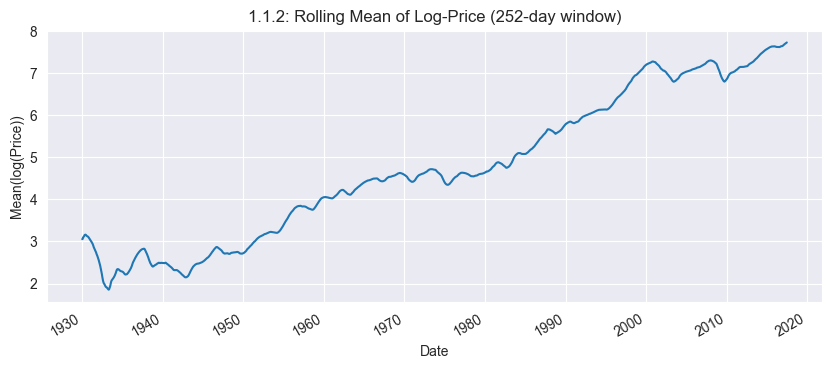

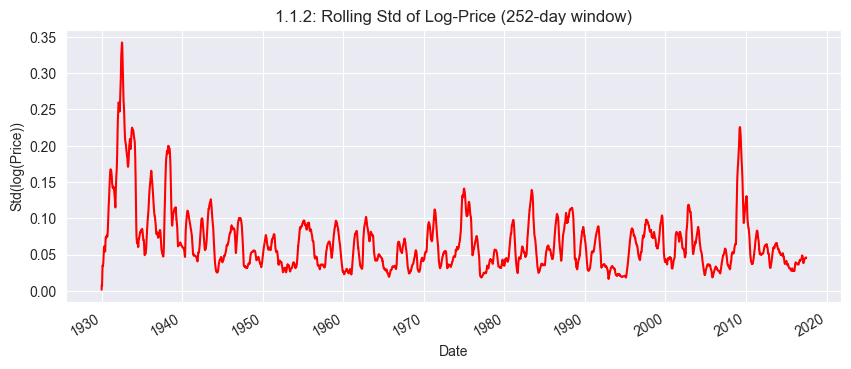

In [5]:
rolling_mean_px = px.rolling(window=252, min_periods=1).mean()
rolling_std_px  = px.rolling(window=252, min_periods=1).std()

rolling_mean_logpx = logpx.rolling(window=252, min_periods=1).mean()
rolling_std_logpx  = logpx.rolling(window=252, min_periods=1).std()

# Plot rolling mean of Price
plt.figure(figsize=(10, 4))
rolling_mean_px.plot()
plt.title("1.1.2: Rolling Mean of Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.grid(True)
plt.show()

# Plot rolling std of Price
plt.figure(figsize=(10, 4))
rolling_std_px.plot(color='red')
plt.title("1.1.2: Rolling Std of Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Std Deviation")
plt.grid(True)
plt.show()

# Plot rolling mean of Log-Price
plt.figure(figsize=(10, 4))
rolling_mean_logpx.plot()
plt.title("1.1.2: Rolling Mean of Log-Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean(log(Price))")
plt.grid(True)
plt.show()

# Plot rolling std of Log-Price
plt.figure(figsize=(10, 4))
rolling_std_logpx.plot(color='red')
plt.title("1.1.2: Rolling Std of Log-Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Std(log(Price))")
plt.grid(True)
plt.show()



## Task3：
Compute the simple and log return time-series from the price data using the script:

```python
# log return
logret = logpx.diff()

# simple return
simpret = px.pct_change()
```

Based on the Python commands in Question 1.1.1, produce figures of the “sliding” statistics of the obtained time-series and comment on the stationarity of these returns in comparison to the figures obtained in Question 1.1.1.

In [11]:
logret = logpx.diff()
simpret = px.pct_change()

C:\Users\polo_\AppData\Local\Temp\ipykernel_9040\1912314780.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simpret = px.pct_change()


`logpx` represents the price series after applying the natural logarithm transformation. Consequently, invoking `.diff()` calculates the difference $\ln(p_t) - \ln(p_{t-1})$.

 `px` is the original price series, and `pct_change()` is equivalent to
$\frac{p_t - p_{t-1}}{p_{t-1}}$.


In [12]:
# Rolling mean & variance of log returns
rolling_mean_logret = logret.rolling(window=252, min_periods=1).mean()
rolling_var_logret  = logret.rolling(window=252, min_periods=1).var()

# Rolling mean & variance of simple returns
rolling_mean_simpret = simpret.rolling(window=252, min_periods=1).mean()
rolling_var_simpret  = simpret.rolling(window=252, min_periods=1).var()

Figure 6: Rolling Mean of Log Returns (252-day window)

The Rolling Mean of Price (Task 2) shows a clear upward trend—from near zero in the 1930s to over 2,000 in recent decades—indicating non-stationarity as the average price continually increases. In contrast, the Rolling Mean of Simple Returns (Task 3) remains close to zero over time, with only minor fluctuations (such as spikes in the 1930s). This relative stability suggests that simple returns are much closer to being stationary compared to raw or log-transformed prices.A constant mean in returns better satisfies the stationarity assumptions necessary for effective statistical analysis and forecasting.



In [13]:

# Plot rolling mean & variance of log returns
plt.figure(figsize=(10, 4))
rolling_mean_logret.plot(color='green')
plt.title("Rolling Mean of Log Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean (log ret)")
plt.grid(True)
plt.show()

Figure 7: Rolling Variance of Log Returns (252-day window)

Task 2 shows that the rolling standard deviation of raw prices was almost zero in the early period, but it surged from the 1970s and became highly significant by the 2000s. This dramatic increase in volatility over time clearly indicates that the variance of prices is not constant, confirming their non-stationary nature.

In contrast, Task 3 reveals that although the rolling standard deviation of simple returns does fluctuate during periods of market turmoil, it generally remains within a narrow band—typically just a few percentage points—and does not exhibit a long-term upward trend. This suggests that the volatility of simple returns is more stable and aligns better with the constant variance assumption required for stationarity.

Overall, while Task 2 highlights the escalating volatility of raw prices over time, Task 3 demonstrates that simple returns maintain a relatively stable volatility pattern, clearly differentiating the two.


In [14]:

plt.figure(figsize=(10, 4))
rolling_var_logret.plot()
plt.title("Rolling Variance of Log Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Variance (log ret)")
plt.grid(True)
plt.show()

Figure 8: Rolling Mean of Simple Returns (252-day window)

**Task 2: Rolling Mean of Log-Price**
This curve starts at approximately 2 in the 1930s and gradually rises to nearly 8 by the 2020s, clearly exhibiting an upward trend. The continual increase in the mean is indicative of non-stationarity, demonstrating that the log-price process does not fluctuate around a fixed average.

**Task 3: Rolling Mean of Log Returns**
In contrast, the 252-day rolling mean of log returns predominantly hovers around zero, showing no significant upward or downward drift. Although occasional spikes occur during periods of intense market volatility, the mean largely remains within a narrow band. A stable mean better aligns with the conditions required for stationarity, even if it does not fully guarantee it.

**Overall Comparison**
In summary, the trend in the rolling mean of log returns is much less pronounced than that of the log-price. This explains why, in the construction of statistical or econometric models, practitioners typically favor using returns over prices, as the former is more likely to meet the stationarity assumptions.

In [15]:

# Plot rolling mean & variance of simple returns
plt.figure(figsize=(10, 4))
rolling_mean_simpret.plot(color='green')
plt.title(" Rolling Mean of Simple Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean (simple ret)")
plt.grid(True)
plt.show()

### Figure 9: Rolling Variance of Simple Returns (252-day window)

Across a lengthy historical timeline, the rolling standard deviation of raw prices remains nearly negligible in early years, only to surge markedly around 1970 and escalate to extraordinarily high levels in the 2000s, underscoring the non-constant variance characteristic of raw prices and affirming their non-stationary nature. In contrast, although the rolling standard deviation of simple returns also shifts—particularly during market upheavals—it typically stays confined to a relatively narrow band, peaking at only a few percentage points rather than leaping to extreme levels. While these movements do reflect changing market conditions, they lack the sustained upward trajectory observed in raw price volatility. Taken together, simple returns display a more consistent volatility pattern, indicating that even before any log transformation, returns adhere more closely to the constant-variance premise associated with stationarity than raw prices do.



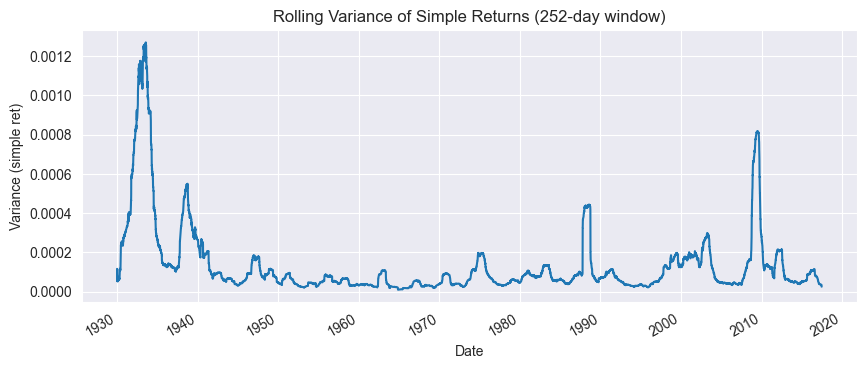

In [16]:

plt.figure(figsize=(10, 4))
rolling_var_simpret.plot()
plt.title("Rolling Variance of Simple Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Variance (simple ret)")
plt.grid(True)
plt.show()


## Task4:
Theoretically justify the suitability of log returns over simple returns for signal processing purposes. Next, [3]
 perform the “Jarque-Bera” test for Gaussianity on the data, and comment on the results in light of your
 theoretical answer (hint: use the Python commands provided below).


 ```python
from scipy import stats
# return the Jarque-Bera test p-value for a time-series x
stats.jarque_bera(x)[1]

**Log Return** is often more suitable than **Simple Return** for signal processing and model-building for several reasons:

1. **Stationarity**
   Log returns are typically closer to being “stationary” compared to simple returns. Prices themselves are often non-stationary, but taking the log and then differencing can often yield a process that is more consistent with the stationarity assumption. This makes it easier to apply various time series models based on stationarity (e.g., ARMA/ARIMA, GARCH).

2. **Additivity**
   Log returns are additive over time. If the log return from \(t_1\) to \(t_2\) is \(r_{t_1\to t_2}\) and from \(t_2\) to \(t_3\) is r_{t_2\to t_3}, then the log return from \(t_1\) to \(t_3\) can be directly obtained by summation:
 $r_{t_1 \to t_3} = r_{t_1 \to t_2} + r_{t_2 \to t_3}$

   This property is convenient for long-term forecasting, cumulative return calculations, and operations such as convolution/filtering in signal processing.

3. **Better compatibility with common distributions (e.g., the normal distribution)**
   In financial time series, returns are often assumed (or approximated) to be normally distributed, whereas raw prices very rarely satisfy a normal distribution assumption. When we take the logarithm of prices and work with log returns, the resulting distribution is more likely to be approximately normal (though in real markets “fat tails” often still exist). Nonetheless, log returns tend to be closer to a symmetric distribution than simple returns.

For these reasons, log returns are generally preferred in most quantitative research and signal processing scenarios.

In [17]:
# Perform Jarque-Bera tests
logret_clean = logret.dropna()
simpret_clean = simpret.dropna()

jb_stat_log, jb_p_log = stats.jarque_bera(logret_clean)
jb_stat_simp, jb_p_simp = stats.jarque_bera(simpret_clean)

print("1.1.4: Jarque-Bera test for log returns:")
print("   JB Statistic =", jb_stat_log, "   p-value =", jb_p_log, "\n")

print("1.1.4: Jarque-Bera test for simple returns:")
print("   JB Statistic =", jb_stat_simp, "   p-value =", jb_p_simp, "\n")



1.1.4: Jarque-Bera test for log returns:
   JB Statistic = 311807.27048989857    p-value = 0.0 

1.1.4: Jarque-Bera test for simple returns:
   JB Statistic = 284160.67730312835    p-value = 0.0 



## Task5:

You
purchase
a
stock
for £1. The next day its value goes up to £2 and the following day back to £1.[1]
Whatare
the
simple and logarithmic
returns
over
this
period and what
can
you
conclude
about
logarithmic
returns on the basis of this example?

**Overall price change:** From Day 1 (£1) to Day 3 (£1), there is ultimately no net change, returning to the initial price.

**Sum of simple returns:** 100% + (−50%) = 50%. This is misleading because it suggests a combined return of +50% over the two days, even though the price returns to £1. Moving from £1 back to £1 should indicate a total change of 0%.

**Sum of log returns:** ln(2) + ln(0.5) = 0.6931 + (−0.6931) = 0. This matches the actual price behavior: since the final price returns to the initial price, the sum of the two log returns is 0, accurately reflecting a net price change of 0.

In other words, **the sum of simple returns does not equal the overall simple return** (i.e., simple returns are not additive), whereas **the sum of log returns is theoretically equivalent to the total return** (because ln(a) + ln(b) = ln(a b)), demonstrating the additive property of log returns.

In [48]:
p0, p1, p2 = 1.0, 2.0, 1.0
simple_ret_1 = (p1 - p0) / p0  # +100%
simple_ret_2 = (p2 - p1) / p1  # -50%

log_ret_1 = np.log(p1) - np.log(p0)   # ln(2)
log_ret_2 = np.log(p2) - np.log(p1)   # ln(1/2) = -ln(2)

# Summations
total_simple = (1 + simple_ret_1)*(1 + simple_ret_2) - 1
total_log = log_ret_1 + log_ret_2

print("1.1.5: Example 1 -> 2 -> 1")
print("   Simple returns per day: ", simple_ret_1, ", ", simple_ret_2)
print("   Log returns per day: ", log_ret_1, ", ", log_ret_2)
print("   Total simple return over two days = ", total_simple)
print("   Total log return over two days = ", total_log, "\n")

1.1.5: Example 1 -> 2 -> 1
   Simple returns per day:  1.0 ,  -0.5
   Log returns per day:  0.6931471805599453 ,  -0.6931471805599453
   Total simple return over two days =  0.0
   Total log return over two days =  0.0 



## Task6:

 Under what circumstances should you not use log returns over simple returns?

**Answer:**
Although log returns are often preferred in many quantitative finance and signal processing scenarios, they are not always the best choice. Here are a few considerations:

When price changes are extremely large or prices approach zero
If price fluctuations are extremely large (for instance, going from 1 all the way down to almost 0, or from 1 soaring to hundreds of times its original value), log returns can become extremely large or even approach infinity (and are undefined if the price reaches 0). In some markets (for example, when an option expires worthless), the price can indeed approach or become zero, and in that case, log returns cannot be applied while simple returns can still be calculated.

When trading activities focus on actual percentage gains or losses
Sometimes investors are directly concerned with “I invested 1 unit, it increased by 10%, then another 10%, so my investment went from 1 to 1.21”—using the concept of compounding to analyze returns. In these situations, simple returns are more intuitive. If the goal is to track “pure percentage change in each period” rather than relying on the additive property of logs, then simple returns may be easier for investors to understand.

Accounting/financial statements
In practical financial decision-making or accounting statements, performance or cost calculations often directly use “the increase or decrease this period compared to the previous period.”

Overall, when you care about long-term (multi-period) returns and want a return measure that is mathematically additive, log returns are generally the better choice. However, if prices undergo multiple surges and crashes, approach zero, or other special scenarios arise, defining and interpreting log returns becomes difficult. In those situations, simple returns or other return measures may be more suitable.

## **1.3 Vector Autoregressive (VAR) Models**
Now, consider a multivariate extension of the **AR** processes, the so-called **VAR(p)** process, given by:

$
y_t \;=\; c \;+\; A_1\,y_{t-1} \;+\; A_2\,y_{t-2} \;+\;\dots\;+\; A_p\,y_{t-p} \;+\; e_t
\quad (2)
$

or, in an expanded matrix notation,

$$
\begin{pmatrix}
y_{1,t}\\
y_{2,t}\\
\vdots\\
y_{k,t}
\end{pmatrix}
=
\begin{pmatrix}
c_1\\
c_2\\
\vdots\\
c_k
\end{pmatrix}
+
\begin{pmatrix}
a^1_{1,1} & a^1_{1,2} & \cdots & a^1_{1,k}\\
a^1_{2,1} & a^1_{2,2} & \cdots & a^1_{2,k}\\
\vdots & \vdots & \ddots & \vdots\\
a^1_{k,1} & a^1_{k,2} & \cdots & a^1_{k,k}
\end{pmatrix}
\begin{pmatrix}
y_{1,t-1}\\
y_{2,t-1}\\
\vdots\\
y_{k,t-1}
\end{pmatrix}
+ \cdots +
\begin{pmatrix}
a^p_{1,1} & a^p_{1,2} & \cdots & a^p_{1,k}\\
a^p_{2,1} & a^p_{2,2} & \cdots & a^p_{2,k}\\
\vdots & \vdots & \ddots & \vdots\\
a^p_{k,1} & a^p_{k,2} & \cdots & a^p_{k,k}
\end{pmatrix}
\begin{pmatrix}
y_{1,t-p}\\
y_{2,t-p}\\
\vdots\\
y_{k,t-p}
\end{pmatrix}
+
\begin{pmatrix}
e_{1,t}\\
e_{2,t}\\
\vdots\\
e_{k,t}
\end{pmatrix}.
\quad (3)
$$


### **Task 1**
Show how Equations (2)-(3) can be represented in a concise matrix form as follows:

$
Y = BZ + U
\quad
$

where $Y \in \mathbb{R}^{k \times T}$, $B \in \mathbb{R}^{k \times (kP+1)}$, $Z \in \mathbb{R}^{(kP+1)\times T}$, and $U \in \mathbb{R}^{k \times T}$.  *(Hint: let $B = [\, c \quad A_1 \quad A_2 \; \dots \; A_p ]$.)*

I'll provide a more detailed solution in English, formatted for a Jupyter Notebook markdown cell.

# 1.3 Vector Autoregressive (VAR) Models - Detailed Solution

#### Question 1:
 Show how Equations (2)-(3) can be represented in a concise matrix form as Equation (4) [10 marks]

Let's develop a comprehensive matrix representation of the VAR(p) process.

The VAR(p) process is given by equation (2):

$$\mathbf{y}_t = \mathbf{c} + \mathbf{A}_1\mathbf{y}_{t-1} + \mathbf{A}_2\mathbf{y}_{t-2} + \cdots + \mathbf{A}_p\mathbf{y}_{t-p} + \mathbf{e}_t$$

Where:
- $\mathbf{y}_t$ is a $K \times 1$ vector of variables at time $t$
- $\mathbf{c}$ is a $K \times 1$ vector of constants
- Each $\mathbf{A}_i$ is a $K \times K$ matrix of coefficients
- $\mathbf{e}_t$ is a $K \times 1$ vector of error terms

Equation (3) provides the expanded matrix notation for each time period $t$.

To represent this system in a concise matrix form as in equation (4): $\mathbf{Y = BZ + U}$, we need to define each matrix carefully:

### Step 1: Define matrix $\mathbf{Y}$

Matrix $\mathbf{Y}$ contains all observations for all $K$ variables across all time periods from $1$ to $T$:

$$\mathbf{Y} = \begin{bmatrix}
y_{1,1} & y_{1,2} & \cdots & y_{1,T} \\
y_{2,1} & y_{2,2} & \cdots & y_{2,T} \\
\vdots & \vdots & \ddots & \vdots \\
y_{K,1} & y_{K,2} & \cdots & y_{K,T}
\end{bmatrix} \in \mathbb{R}^{K \times T}$$

Where $y_{i,t}$ represents the value of the $i$-th variable at time $t$.

### Step 2: Define matrix $\mathbf{Z}$

Matrix $\mathbf{Z}$ contains all explanatory variables (constant term and lagged values):

$$\mathbf{Z} = \begin{bmatrix}
1 & 1 & \cdots & 1 \\
\mathbf{y}_{0}' & \mathbf{y}_{1}' & \cdots & \mathbf{y}_{T-1}' \\
\mathbf{y}_{-1}' & \mathbf{y}_{0}' & \cdots & \mathbf{y}_{T-2}' \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{y}_{1-p}' & \mathbf{y}_{2-p}' & \cdots & \mathbf{y}_{T-p}'
\end{bmatrix} \in \mathbb{R}^{(KP+1) \times T}$$

Where:
- The first row consists of ones for the constant term
- Each subsequent block of $K$ rows contains the lagged values of all variables
- $\mathbf{y}_{t}' = [y_{1,t}, y_{2,t}, \ldots, y_{K,t}]$ is the transpose of $\mathbf{y}_t$

More explicitly, we can write:

$$\mathbf{Z} = \begin{bmatrix}
1 & 1 & \cdots & 1 \\
y_{1,0} & y_{1,1} & \cdots & y_{1,T-1} \\
y_{2,0} & y_{2,1} & \cdots & y_{2,T-1} \\
\vdots & \vdots & \ddots & \vdots \\
y_{K,0} & y_{K,1} & \cdots & y_{K,T-1} \\
y_{1,-1} & y_{1,0} & \cdots & y_{1,T-2} \\
y_{2,-1} & y_{2,0} & \cdots & y_{2,T-2} \\
\vdots & \vdots & \ddots & \vdots \\
y_{K,1-p} & y_{K,2-p} & \cdots & y_{K,T-p}
\end{bmatrix}$$

This matrix has dimensions $(KP+1) \times T$ because:
- We have 1 row for the constant term
- We have $K$ rows for each of the $p$ lags
- Total: $1 + K \times p = KP + 1$ rows
- We have $T$ columns, one for each time period

### Step 3: Define coefficient matrix $\mathbf{B}$

Matrix $\mathbf{B}$ contains all the coefficients:

$$\mathbf{B} = \begin{bmatrix}
\mathbf{c} & \mathbf{A}_1 & \mathbf{A}_2 & \cdots & \mathbf{A}_p
\end{bmatrix} \in \mathbb{R}^{K \times (KP+1)}$$

To be more explicit, if we expand this matrix:

$$\mathbf{B} = \begin{bmatrix}
c_1 & a^1_{1,1} & a^1_{1,2} & \cdots & a^1_{1,K} & a^2_{1,1} & \cdots & a^p_{1,K} \\
c_2 & a^1_{2,1} & a^1_{2,2} & \cdots & a^1_{2,K} & a^2_{2,1} & \cdots & a^p_{2,K} \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
c_K & a^1_{K,1} & a^1_{K,2} & \cdots & a^1_{K,K} & a^2_{K,1} & \cdots & a^p_{K,K}
\end{bmatrix}$$

Where:
- $c_i$ is the $i$-th element of the constant vector $\mathbf{c}$
- $a^j_{i,k}$ is the $(i,k)$-th element of matrix $\mathbf{A}_j$

### Step 4: Define error matrix $\mathbf{U}$

Matrix $\mathbf{U}$ contains all the error terms:

$$\mathbf{U} = \begin{bmatrix}
e_{1,1} & e_{1,2} & \cdots & e_{1,T} \\
e_{2,1} & e_{2,2} & \cdots & e_{2,T} \\
\vdots & \vdots & \ddots & \vdots \\
e_{K,1} & e_{K,2} & \cdots & e_{K,T}
\end{bmatrix} \in \mathbb{R}^{K \times T}$$

### Step 5: Verify the matrix equation $\mathbf{Y = BZ + U}$

With these definitions, we can now verify that $\mathbf{Y = BZ + U}$ correctly represents the VAR(p) process.

When we multiply $\mathbf{B}$ and $\mathbf{Z}$, we get:

$$\mathbf{BZ} = \begin{bmatrix}
\mathbf{c} & \mathbf{A}_1 & \mathbf{A}_2 & \cdots & \mathbf{A}_p
\end{bmatrix} \begin{bmatrix}
1 & 1 & \cdots & 1 \\
\mathbf{y}_{0}' & \mathbf{y}_{1}' & \cdots & \mathbf{y}_{T-1}' \\
\mathbf{y}_{-1}' & \mathbf{y}_{0}' & \cdots & \mathbf{y}_{T-2}' \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{y}_{1-p}' & \mathbf{y}_{2-p}' & \cdots & \mathbf{y}_{T-p}'
\end{bmatrix}$$

For each column $t$ of this product, we get:

$$(\mathbf{BZ})_{:,t} = \mathbf{c} \cdot 1 + \mathbf{A}_1 \mathbf{y}_{t-1} + \mathbf{A}_2 \mathbf{y}_{t-2} + \cdots + \mathbf{A}_p \mathbf{y}_{t-p}$$

Which is exactly the right-hand side of equation (2) without the error term.

Therefore, $\mathbf{Y = BZ + U}$ is indeed the concise matrix form of equations (2)-(3), with each matrix having the dimensions specified in equation (4):
- $\mathbf{Y} \in \mathbb{R}^{K \times T}$
- $\mathbf{B} \in \mathbb{R}^{K \times (KP+1)}$
- $\mathbf{Z} \in \mathbb{R}^{(KP+1) \times T}$
- $\mathbf{U} \in \mathbb{R}^{K \times T}$

And as indicated in the hint, $\mathbf{B} = [\mathbf{c} \quad \mathbf{A}_1 \quad \mathbf{A}_2 \cdots \mathbf{A}_p]$.



----------------------------------------------------

### **Task 2**

Hence, show that the optimal set of coefficients $B$, denoted by $B_{\mathrm{opt}}$, is obtained via:

$
B_{\mathrm{opt}} = YZ^T \; (ZZ^T)^{-1}
\quad
$

Show the whole derivation for full marks.


#### Question 2:
Show that the optimal set of coefficients $\mathbf{B}$, denoted by $\mathbf{B}_{opt}$, is obtained via equation (5) [5 marks]

To find the optimal set of coefficients $\mathbf{B}_{opt}$, we need to minimize the sum of squared errors. This is a multivariate regression problem.

### Step 1: Define the objective function

We want to minimize the squared Frobenius norm of the error matrix:

$$\min_{\mathbf{B}} \| \mathbf{Y - BZ} \|_F^2$$

Where $\| \cdot \|_F$ denotes the Frobenius norm.

### Step 2: Expand the Frobenius norm

The Frobenius norm squared can be written as:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[(\mathbf{Y - BZ})(\mathbf{Y - BZ})^T]$$

Where $\text{Tr}[\cdot]$ denotes the trace of a matrix.

Expanding this expression:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[\mathbf{Y}\mathbf{Y}^T - \mathbf{Y}\mathbf{Z}^T\mathbf{B}^T - \mathbf{B}\mathbf{Z}\mathbf{Y}^T + \mathbf{B}\mathbf{Z}\mathbf{Z}^T\mathbf{B}^T]$$

Using the properties of the trace:
- $\text{Tr}[\mathbf{AB}] = \text{Tr}[\mathbf{BA}]$ for conformable matrices
- $\text{Tr}[\mathbf{A} + \mathbf{B}] = \text{Tr}[\mathbf{A}] + \text{Tr}[\mathbf{B}]$
- $\text{Tr}[\mathbf{A}^T] = \text{Tr}[\mathbf{A}]$

We can simplify:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[\mathbf{Y}\mathbf{Y}^T] - \text{Tr}[\mathbf{Y}\mathbf{Z}^T\mathbf{B}^T] - \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Y}^T] + \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Z}^T\mathbf{B}^T]$$

Since $\text{Tr}[\mathbf{Y}\mathbf{Z}^T\mathbf{B}^T] = \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Y}^T]$, we have:

$$\| \mathbf{Y - BZ} \|_F^2 = \text{Tr}[\mathbf{Y}\mathbf{Y}^T] - 2\text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Y}^T] + \text{Tr}[\mathbf{B}\mathbf{Z}\mathbf{Z}^T\mathbf{B}^T]$$

### Step 3: Take the derivative with respect to $\mathbf{B}$

To find the minimum, we take the derivative with respect to $\mathbf{B}$ and set it equal to zero:

$$\frac{\partial}{\partial \mathbf{B}}\| \mathbf{Y - BZ} \|_F^2 = 0$$

Using matrix calculus:
- $\frac{\partial}{\partial \mathbf{X}}\text{Tr}[\mathbf{AX}^T] = \mathbf{A}$
- $\frac{\partial}{\partial \mathbf{X}}\text{Tr}[\mathbf{XAX}^T] = \mathbf{XA} + \mathbf{XA}$

We get:

$$\frac{\partial}{\partial \mathbf{B}}\| \mathbf{Y - BZ} \|_F^2 = -2\mathbf{Y}\mathbf{Z}^T + 2\mathbf{B}\mathbf{Z}\mathbf{Z}^T = 0$$

### Step 4: Solve for $\mathbf{B}_{opt}$

Rearranging the equation:

$$2\mathbf{B}\mathbf{Z}\mathbf{Z}^T = 2\mathbf{Y}\mathbf{Z}^T$$

$$\mathbf{B}\mathbf{Z}\mathbf{Z}^T = \mathbf{Y}\mathbf{Z}^T$$

If $\mathbf{Z}\mathbf{Z}^T$ is invertible (which is typically the case when $T$ is sufficiently large and there is no perfect multicollinearity), we can multiply both sides by $(\mathbf{Z}\mathbf{Z}^T)^{-1}$ on the right:

$$\mathbf{B} = \mathbf{Y}\mathbf{Z}^T(\mathbf{Z}\mathbf{Z}^T)^{-1}$$

### Step 5: Verify the result

This gives us the optimal coefficient matrix $\mathbf{B}_{opt}$ that minimizes the sum of squared errors:

$$\mathbf{B}_{opt} = \mathbf{Y}\mathbf{Z}^T(\mathbf{Z}\mathbf{Z}^T)^{-1}$$

Which matches equation (5) in the problem statement.


### Additional insights:

1. This formula is a direct extension of the standard OLS estimator to the multivariate case.

2. The condition for invertibility of $\mathbf{Z}\mathbf{Z}^T$ is equivalent to having:
   - Sufficient observations ($T > KP + 1$)
   - No perfect multicollinearity among the regressors
   - Sufficient variation in the data

3. This estimator is:
   - Consistent under standard assumptions
   - Asymptotically normal under appropriate regularity conditions
   - Equivalent to separate OLS estimation for each equation when the same regressors appear in all equations

4. The matrix $\mathbf{Z}\mathbf{Z}^T$ has dimensions $(KP+1) \times (KP+1)$ and represents the sample covariance matrix of the regressors, while $\mathbf{Y}\mathbf{Z}^T$ has dimensions $K \times (KP+1)$ and represents the sample cross-covariance between the dependent variables and the regressors.

5. In computational practice, it's often more numerically stable to compute $\mathbf{B}_{opt}$ using QR decomposition or SVD rather than explicitly forming the inverse of $\mathbf{Z}\mathbf{Z}^T$.

Thus, fully derived and justified equation (5) as stated in the problem.

----------------------------------

### **Task 3**
Now, consider a VAR(1) process, that is

$
y_t \;=\; A\,y_{t-1} \;+\; e_t
\quad (6)
$

For the previous time instant, the above can be rewritten as

$
y_{t-1} \;=\; A\,y_{t-2} \;+\; e_{t-1}
\quad (7)
$

Using Equations (6)–(7), elaborate on how, for stability, all the eigenvalues of the matrix \(A\) must be less than 1 in absolute value.

-----------------------------------------------------
### **Task 4**

#### **Background**
In the following, you will investigate how VAR models can aid in the construction of portfolios. You will need to import the following Python packages:

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
```
Then, load the required data:

```python
df = pd.read_csv(r'snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)
```
the file
```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_allstocks_2015_2019.csv
```
Contains daily closing prices of all stocks composing the **S&P** 500 index in the period from January 1, 2015 to January 1, 2019.


```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_info.csv
```
Contains additional information related to each stock (e.g. sector, headquarters location, etc.).